In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


Info in <TUnixSystem::ACLiC>: creating shared library /home/submit/pdmonte/Hrare2023/analysis/func_marti_cc.so


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


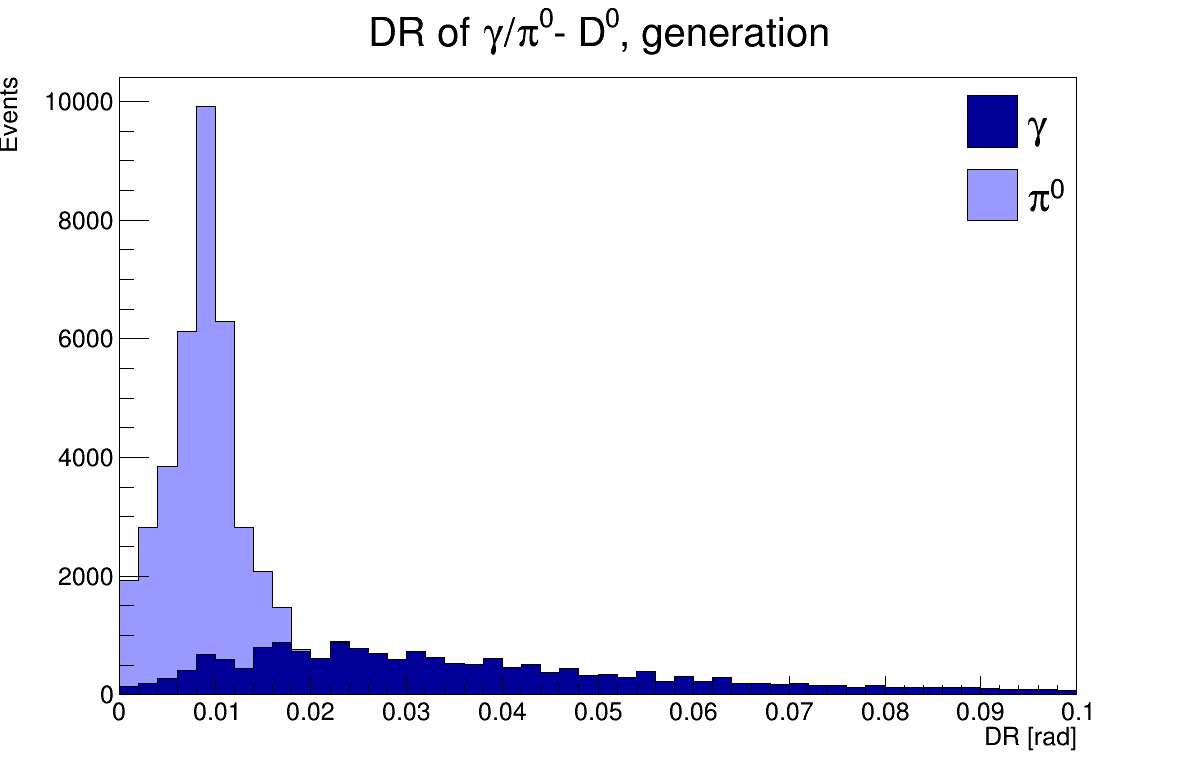

In [30]:
date = "MAY09"

chain = ROOT.TChain("events");
chain.Add("/home/submit/pdmonte/Hrare2023/analysis/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chain)

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

hg = df.Define("PhotonD0StarGenDR", "getDRParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 22, 423, 25, 421, 423, 25)")\
	.Histo1D(("hist", "#gamma from D^{0}* DR GEN", 50, 0, 0.1),"PhotonD0StarGenDR")

hp = df.Define("Pi0D0StarGenDR", "getDRParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 111, 423, 25, 421, 423, 25)")\
	.Histo1D(("hist", "#pi^{0} from D^{0}* DR GEN", 50, 0, 0.1),"Pi0D0StarGenDR")


hg.SetFillColor(ROOT.kBlue+2)
hp.SetFillColor(ROOT.kBlue-9)
hg.SetLineColor(ROOT.kBlack)
hp.SetLineColor(ROOT.kBlack)

stack = ROOT.THStack("stack", "DR of #gamma/#pi^{0}- D^{0}, generation")
stack.Add(hg.GetValue())
stack.Add(hp.GetValue())
stack.Draw()
stack.GetXaxis().SetTitle("DR [rad]")
stack.GetYaxis().SetTitle("Events")

legend = ROOT.TLegend(0.8, 0.7, 0.8999, 0.89)
legend.SetMargin(0.6)
legend.SetBorderSize(0)
legend.AddEntry(hg.GetValue(), "#gamma", "f")
legend.AddEntry(hp.GetValue(), "#pi^{0}", "f")
legend.Draw()

#canvas.SetLogy()
#canvas.SetLogx()

canvas.Draw()
#canvas.SaveAs("~/public_html/plotsMAY24/D0StarBKG_kin_mass.png")

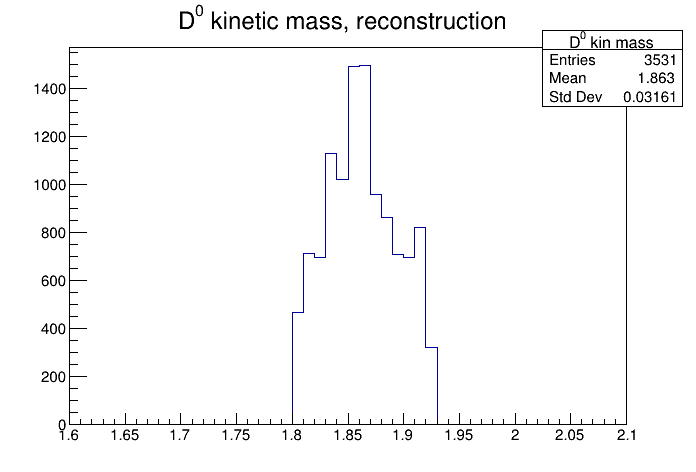

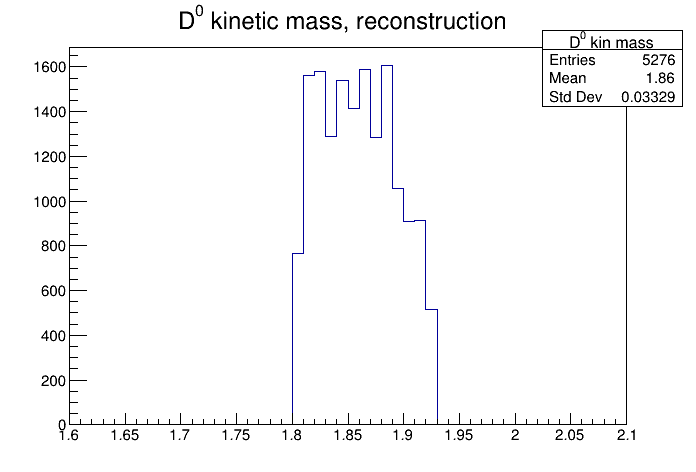

In [7]:
canvas = ROOT.TCanvas()
hBKG = dg.Define("scale", "w*lumiIntegrated")\
    .Define("goodMeson_mass_D0", "getValuesIdParticle(goodMeson_mass, GenPart_pdgId, 421, 1)")\
	.Histo1D(("D^{0} kin mass", "D^{0} kinetic mass, reconstruction", 50, 1.6, 2.1),"goodMeson_mass_D0", "scale")
hBKG.Draw("hist")
canvas.Draw()

canvas2 = ROOT.TCanvas()
hBKG2 = dg.Define("scale", "w*lumiIntegrated")\
    .Define("goodMeson_mass_D0", "getValuesIdParticle(goodMeson_mass, GenPart_pdgId, 421, 0)")\
	.Histo1D(("D^{0} kin mass", "D^{0} kinetic mass, reconstruction", 50, 1.6, 2.1),"goodMeson_mass_D0", "scale")
hBKG2.Draw("hist")
canvas2.Draw()